# Billionaires Dataset Analysis

Import packages

In [189]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Read the dataset

In [158]:
df = pd.read_csv('Billionaire.csv')

In [159]:
df.head()

,Name,NetWorth,Country,Source,Rank,Age,Industry
0,Jeff Bezos,$177 B,United States,Amazon,1,57.0,Technology
1,Elon Musk,$151 B,United States,"Tesla, SpaceX",2,49.0,Automotive
2,Bernard Arnault & family,$150 B,France,LVMH,3,72.0,Fashion & Retail
3,Bill Gates,$124 B,United States,Microsoft,4,65.0,Technology
4,Mark Zuckerberg,$97 B,United States,Facebook,5,36.0,Technology


### Data investigation

In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2755 entries, 0 to 2754
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      2755 non-null   object 
 1   NetWorth  2755 non-null   object 
 2   Country   2755 non-null   object 
 3   Source    2755 non-null   object 
 4   Rank      2755 non-null   int64  
 5   Age       2676 non-null   float64
 6   Industry  2755 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 150.8+ KB


In [161]:
df.isna().sum()

Name         0
NetWorth     0
Country      0
Source       0
Rank         0
Age         79
Industry     0
dtype: int64

Drop the missing values

In [162]:
df.dropna(inplace=True)
df.isna().sum()

Name        0
NetWorth    0
Country     0
Source      0
Rank        0
Age         0
Industry    0
dtype: int64

### Exploratory data analysis

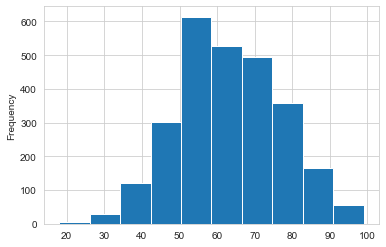

In [163]:
df['Age'].plot(kind='hist');

Histogram shows the normal  distribution of ages in the dataset, the mode of the age is around 50-60.

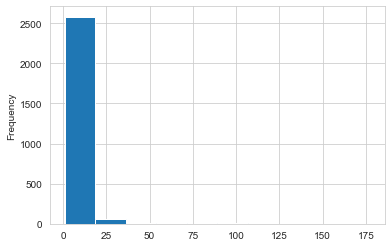

In [164]:
df['NetWorth'] = df['NetWorth'].str.extract('(\d+)').astype(int) #Extract the networth integer from the string
df['NetWorth'].plot(kind='hist');

The distribution of the networth in the dataset shows right skewness and most of values are between 0-25 billions.

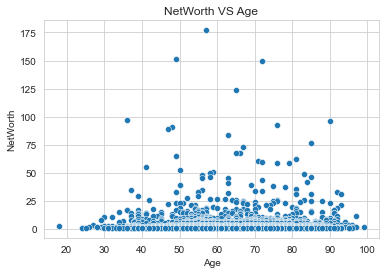

In [165]:
sns.set_style('whitegrid')
sns.scatterplot(y='NetWorth', x='Age', data=df)
plt.title('NetWorth VS Age');

There is no correlation between the age and the networth in the dataset.

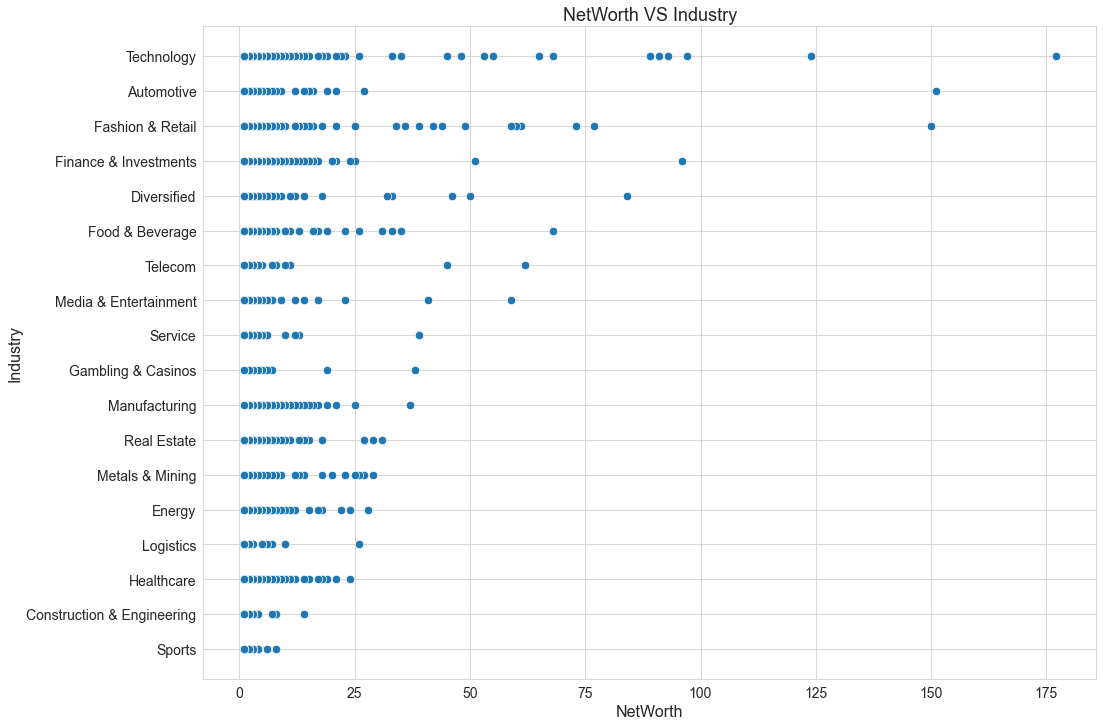

In [166]:
plt.figure(figsize=(16,12))
sns.scatterplot(x='NetWorth', y='Industry', data=df, s=70)
plt.title('NetWorth VS Industry', fontsize=18)
plt.xlabel('NetWorth',fontsize=16)
plt.ylabel('Industry',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show();

Scatter plot shows the relation between the industy and the networth, Technology is the most achieving industry.

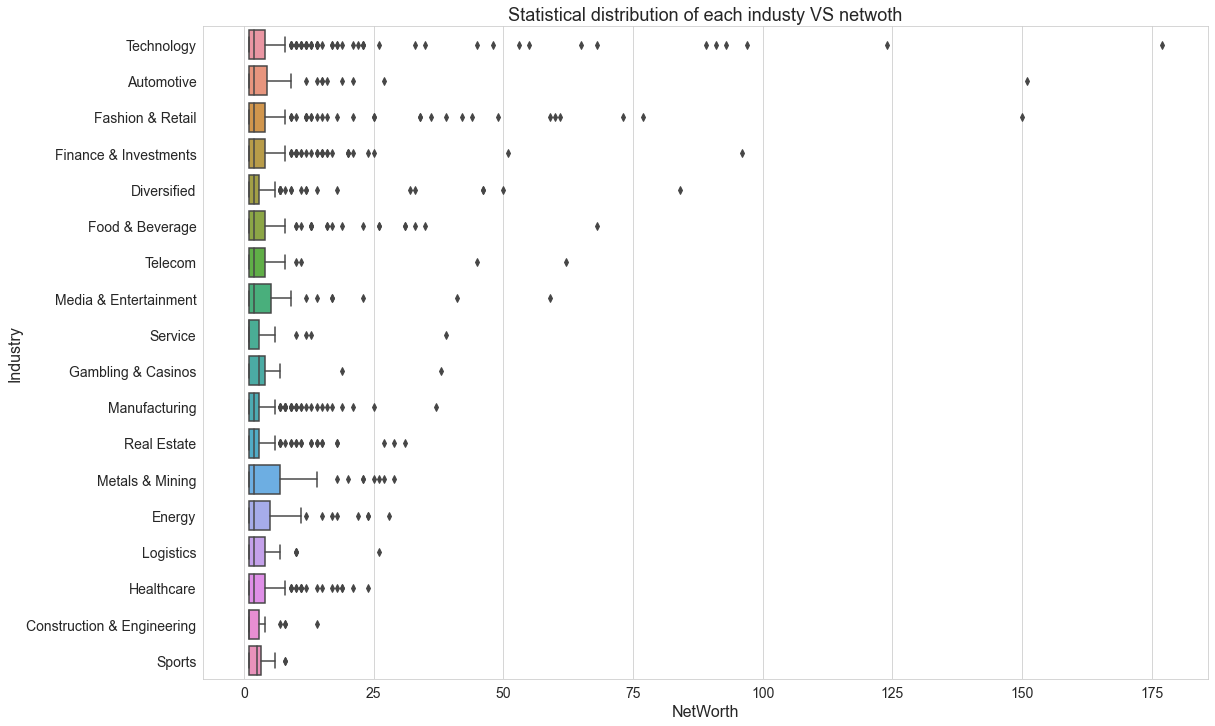

In [167]:
plt.figure(figsize=(18,12))
sns.boxplot(x='NetWorth', y='Industry', data=df)
plt.title('Statistical distribution of each industy VS netwoth', fontsize=18)
plt.xlabel('NetWorth',fontsize=16)
plt.ylabel('Industry',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show();

Although technology is the number one networth-wise industry, the box plot shows that high networth values are outliers.

In [195]:
#Creating a dataframe combining between number of billionaires and the networth.
d1 = pd.DataFrame(df.groupby('Industry')['NetWorth'].sum().sort_values(ascending=False))
d2 = pd.DataFrame(df.groupby('Industry')['Name'].count().sort_values(ascending=False))
d3 = d1.merge(d2, on='Industry')
d3

,NetWorth,Name
Industry,,
Technology,2297,355
Fashion & Retail,1576,268
Finance & Investments,1357,365
Manufacturing,945,317
Food & Beverage,884,204
Diversified,757,180
Real Estate,706,211
Healthcare,696,213
Media & Entertainment,437,92


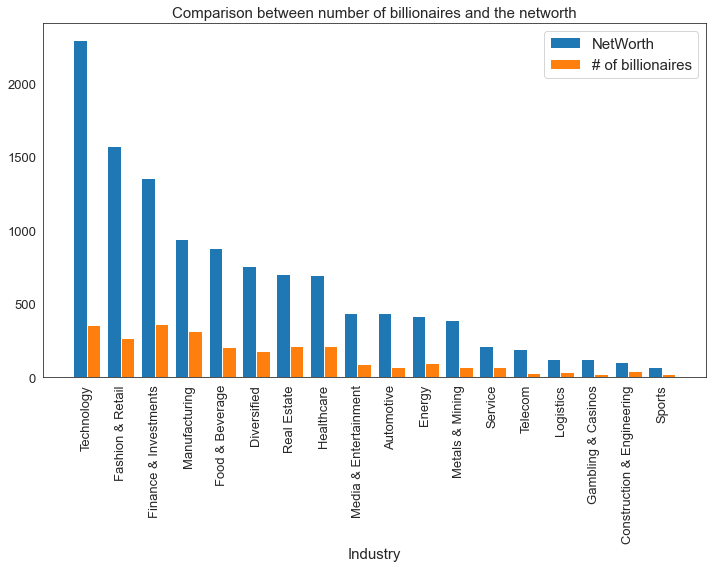

In [199]:
sns.set_style("white")
width = 0.4  # the width of the bars
x = np.arange(len(d3.index))
fig, ax = plt.subplots(figsize=(10,8))
rects1 = ax.bar(x - width/2, d3['NetWorth'], width, label='NetWorth')
rects2 = ax.bar(x + width/2, d3['Name'], width, label='# of billionaires')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Industry', fontsize=15)
ax.set_title('Country')
ax.set_xticks(x, d3.index, fontsize=13, rotation=90)
plt.yticks(fontsize=13)
ax.legend(fontsize=15)

plt.title('Comparison between number of billionaires and the networth', fontsize=15)
fig.tight_layout()

plt.show()

As shown from the previous dataframe and the grouped bar chart, Technology, Fashion & Retail, and Finance & Investments are having the highest number of billionaires.

In [170]:
data_source = pd.DataFrame(df.groupby('Source')['NetWorth'].sum().sort_values(ascending=False))[0:5]

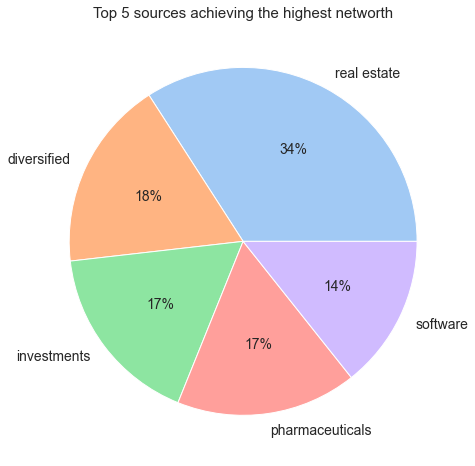

In [171]:
source = data_source.index
networth = data_source['NetWorth']

labels = source
values = networth
colors = sns.color_palette('pastel')
plt.figure(figsize = (10,8))
plt.pie(values, labels = labels, colors = colors, autopct='%.0f%%', textprops={'fontsize': 14})
plt.title('Top 5 sources achieving the highest networth', fontsize=15)
plt.show()

Pie chart shows the top 5 sources for networth where the real estate is dominating.

In [172]:
data_country=pd.DataFrame(df['Country'].value_counts()[0:10])

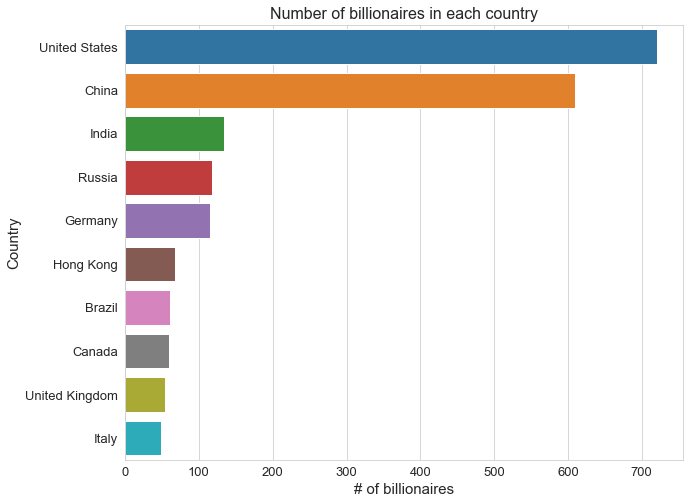

In [201]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,8))
sns.barplot(y=data_country.index, x='Country', data=data_country)
plt.title('Number of billionaires in each country', fontsize=16)
plt.xlabel('# of billionaires',fontsize=15)
plt.ylabel('Country',fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()

The most billionaires are coming from USA followed by China and India.

### Conclusion

1) This dataset shows the billionaires around the world and their age, industry, country and networth.

2) The dataset is almost  clean and neat.

3) Billionaires in the technology industry seem to be the highest networth, but most of values are outliers.

4) There is no relation between networth and age.

5) Technology, Fashion & Retail, and Finance & Investments are the most invested-in industries.

6) Real estate is the highest source for the networth.

7) Over 700 billionaires are from USA, followed by china where there is over 600 billionaires.